Il est préférable de consulter le notebook Predict_VAR avant celui-ci, car nous utilisons des résultats que nous avons déja obtenus .

In [ ]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error
from datetime import datetime,date
import statsmodels.tsa.seasonal
import copy
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
#importation des données
data=pd.read_table("train.csv",sep = ',',header = 0)

In [3]:
data=data[['temperature','electricity_consumption']]

In [5]:
data9=data[1104:1656]

In [6]:
#extraire les 2 colonnes de la consammation et la température.
timeseries=pd.DataFrame(data= data9.values, columns= ['temperature','electricity_consumption'] , index=pd.DatetimeIndex(start='2013-09-01 00:00:00' , periods=552 , freq='h'))
training=timeseries[:408]
test=timeseries['electricity_consumption'][408:]

C:\Users\aymane leyli\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [8]:
#Application du modéle pour la prédiction 6h.
import warnings
warnings.filterwarnings("ignore")
pred=list()
Actual=copy.deepcopy(training)
l=pd.date_range('2013-09-18 00:00:00',periods=144,freq='h')
for i in range(144):

    if i%6==0:
        Actual=copy.deepcopy(timeseries[:408+i]) 
    model = VARMAX(Actual, order=(1, 4))
    results = model.fit(disp=False)


    PredictedValue=results.predict(start=l[i].to_pydatetime())['electricity_consumption'][0]
    pred.append(PredictedValue)
    Actual=copy.deepcopy(timeseries[:408+i])
    Actual['electricity_consumption'][407+i]=PredictedValue
    



In [10]:
predict=pd.Series(np.array(pred),index=pd.date_range('2013-09-18 00:00:00',periods=144,freq='h'))

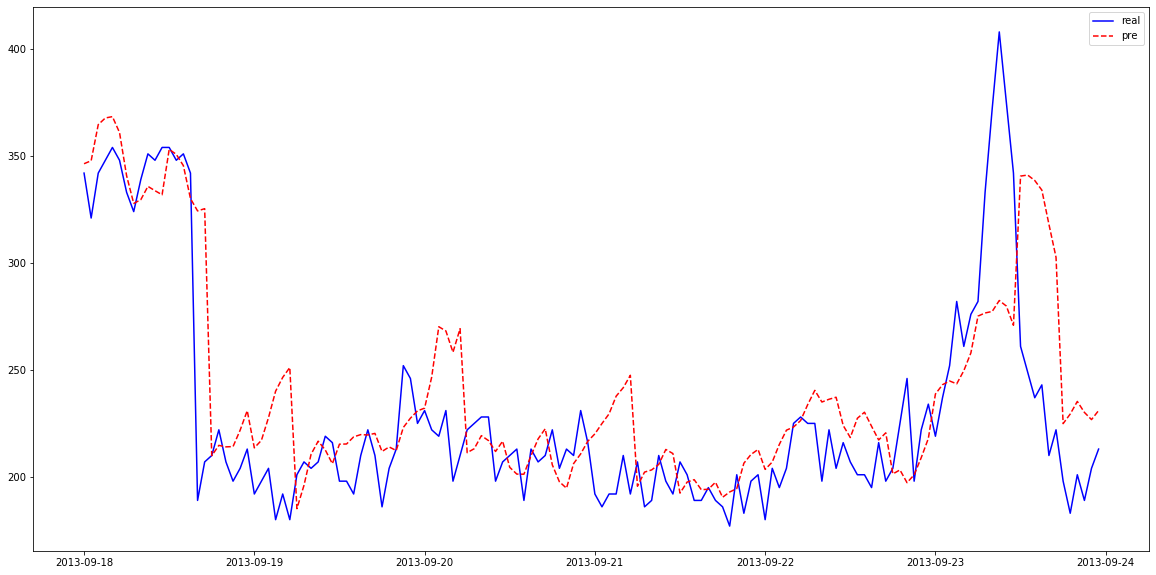

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(test, '-b', label='real')
ax.plot(predict, '--r', label='pre')

leg = ax.legend();
plt.savefig('varma.png')

In [12]:
Error=mean_squared_error(test,predict)
Error

1346.739376819001